In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
import nltk
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
reviews=pd.read_csv('amazon_product_review.csv')
reviews

stars                                            comment
0         5  This product so far has not disappointed. My c...
1         5  great for beginner or experienced person. Boug...
2         5  Inexpensive tablet for him to use and learn on...
3         4  I've had my Fire HD 8 two weeks now and I love...
4         5  I bought this for my grand daughter when she c...
...     ...                                                ...
2809      5  I had the original Kindle and just decided to ...
2810      5  My 10 year old daughter loves it. Battery grea...
2811      5  Several friends suggested I buy the Kindle Fir...
2812      5  I had a new one but it stopped working....So I...
2813      4  Loved it very good screen quality and clarity,...

[2814 rows x 2 columns]

## Text Preprocessing

In [3]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.',
 'great for beginner or experienced person. Bought as a gift and she loves it',
 'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...',
 "I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.",
 'I bought this for my grand daughter 

In [4]:
reviews_text=' '.join(reviews)
reviews_text

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease. great for beginner or experienced person. Bought as a gift and she loves it Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already... I\'ve had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands. I bought this for my grand daughter when she comes o

In [5]:
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'This product so far has not disappointed My children love to use it and I like the ability to monitor control what content they see with ease great for beginner or experienced person Bought as a gift and she loves it Inexpensive tablet for him to use and learn on step up from the NABI He was thrilled with it learn how to Skype on it already Ive had my Fire HD 8 two weeks now and I love it This tablet is a great valueWe are Prime Members and that is where this tablet SHINES I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing 900 base model The build on this fire is INSANELY AWESOME running at only 77mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands I bought this for my grand daughter when she comes over to visit I set 

In [6]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['This', 'product', 'so', 'far', 'has', 'not', 'disappointed', 'My', 'children', 'love', 'to', 'use', 'it', 'and', 'I', 'like', 'the', 'ability', 'to', 'monitor', 'control', 'what', 'content', 'they', 'see', 'with', 'ease', 'great', 'for', 'beginner', 'or', 'experienced', 'person', 'Bought', 'as', 'a', 'gift', 'and', 'she', 'loves', 'it', 'Inexpensive', 'tablet', 'for', 'him', 'to', 'use', 'and', 'learn', 'on']


In [7]:
len(text_tokens)

80782

In [8]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['This', 'product', 'far', 'disappointed', 'My', 'children', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'ease', 'great', 'beginner', 'experienced', 'person', 'Bought', 'gift', 'loves', 'Inexpensive', 'tablet', 'use', 'learn', 'step', 'NABI', 'He', 'thrilled', 'learn', 'Skype', 'already', 'Ive', 'Fire', 'HD', '8', 'two', 'weeks', 'love', 'This', 'tablet', 'great', 'valueWe', 'Prime', 'Members', 'tablet', 'SHINES', 'love', 'able', 'easily', 'access', 'Prime', 'content', 'well', 'movies', 'download', 'watch', 'laterThis', '1280800', 'screen', 'really', 'nice', 'look', 'nice', 'crisp', 'bright', 'infact', 'brighter', 'ipad', 'pro', 'costing', '900', 'base', 'model', 'build', 'fire', 'INSANELY', 'AWESOME', 'running', '77mm', 'thick', 'smooth', 'glossy', 'feel', 'back', 'really', 'amazing', 'hold', 'like', 'futuristic', 'tab', 'ur', 'hands', 'bought', 'grand', 'daughter', 'comes', 'visit', 'set', 'user', 'entered', 'age', 'name', 'Amazon', 'makes', 'sure', 'acc

In [9]:
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['this', 'product', 'far', 'disappointed', 'my', 'children', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'ease', 'great', 'beginner', 'experienced', 'person', 'bought', 'gift', 'loves', 'inexpensive', 'tablet', 'use', 'learn', 'step', 'nabi', 'he', 'thrilled', 'learn', 'skype', 'already', 'ive', 'fire', 'hd', '8', 'two', 'weeks', 'love', 'this', 'tablet', 'great', 'valuewe', 'prime', 'members', 'tablet', 'shines', 'love', 'able', 'easily', 'access', 'prime', 'content', 'well', 'movies', 'download', 'watch', 'laterthis', '1280800', 'screen', 'really', 'nice', 'look', 'nice', 'crisp', 'bright', 'infact', 'brighter', 'ipad', 'pro', 'costing', '900', 'base', 'model', 'build', 'fire', 'insanely', 'awesome', 'running', '77mm', 'thick', 'smooth', 'glossy', 'feel', 'back', 'really', 'amazing', 'hold', 'like', 'futuristic', 'tab', 'ur', 'hands', 'bought', 'grand', 'daughter', 'comes', 'visit', 'set', 'user', 'entered', 'age', 'name', 'amazon', 'makes', 'sure', 'acc

In [10]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['thi', 'product', 'far', 'disappoint', 'my', 'children', 'love', 'use', 'like', 'abil', 'monitor', 'control', 'content', 'see', 'eas', 'great', 'beginn', 'experienc', 'person', 'bought', 'gift', 'love', 'inexpens', 'tablet', 'use', 'learn', 'step', 'nabi', 'he', 'thrill', 'learn', 'skype', 'alreadi', 'ive', 'fire', 'hd', '8', 'two', 'week', 'love', 'thi', 'tablet', 'great', 'valuew', 'prime', 'member', 'tablet', 'shine', 'love', 'abl', 'easili', 'access', 'prime', 'content', 'well', 'movi', 'download', 'watch', 'laterthi', '1280800', 'screen', 'realli', 'nice', 'look', 'nice', 'crisp', 'bright', 'infact', 'brighter', 'ipad', 'pro', 'cost', '900', 'base', 'model', 'build', 'fire', 'insan', 'awesom', 'run', '77mm', 'thick', 'smooth', 'glossi', 'feel', 'back', 'realli', 'amaz', 'hold', 'like', 'futurist', 'tab', 'ur', 'hand', 'bought', 'grand', 'daughter', 'come', 'visit', 'set', 'user', 'enter', 'age', 'name', 'amazon', 'make', 'sure', 'access', 'site', 'content', 'appropri', 'age', 'si

In [11]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

this product far disappointed my children love use like ability monitor control content see ease great beginner experienced person bought gift loves inexpensive tablet use learn step nabi he thrilled learn skype already ive fire hd 8 two weeks love this tablet great valuewe prime members tablet shines love able easily access prime content well movies download watch laterthis 1280800 screen really nice look nice crisp bright infact brighter ipad pro costing 900 base model build fire insanely awesome running 77mm thick smooth glossy feel back really amazing hold like futuristic tab ur hands bought grand daughter comes visit set user entered age name amazon makes sure accesses sites content appropriate age simple loves capabilities also bought installed 64gig sd card gives little tablet plenty storage for price think tablet best one you spend hundreds dollars additional speed capacity comes basics tablets everything people ever need fraction cost this amazon fire 8 inch tablet perfect siz

In [12]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['this', 'product', 'far', 'disappoint', 'my', 'child', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'ease', 'great', 'beginner', 'experience', 'person', 'buy', 'gift', 'love', 'inexpensive', 'tablet', 'use', 'learn', 'step', 'nabi', 'he', 'thrill', 'learn', 'skype', 'already', 'I', 've', 'fire', 'hd', '8', 'two', 'week', 'love', 'this', 'tablet', 'great', 'valuewe', 'prime', 'member', 'tablet', 'shine', 'love', 'able', 'easily', 'access', 'prime', 'content', 'well', 'movie', 'download', 'watch', 'laterthis', '1280800', 'screen', 'really', 'nice', 'look', 'nice', 'crisp', 'bright', 'infact', 'bright', 'ipad', 'pro', 'cost', '900', 'base', 'model', 'build', 'fire', 'insanely', 'awesome', 'run', '77', 'mm', 'thick', 'smooth', 'glossy', 'feel', 'back', 'really', 'amazing', 'hold', 'like', 'futuristic', 'tab', 'ur', 'hand', 'buy', 'grand', 'daughter', 'come', 'visit', 'set', 'user', 'enter', 'age', 'name', 'amazon', 'make', 'sure', 'access', 'site', 'content', 

In [13]:
clean_reviews=' '.join(lemmas)
clean_reviews

"this product far disappoint my child love use like ability monitor control content see ease great beginner experience person buy gift love inexpensive tablet use learn step nabi he thrill learn skype already I ve fire hd 8 two week love this tablet great valuewe prime member tablet shine love able easily access prime content well movie download watch laterthis 1280800 screen really nice look nice crisp bright infact bright ipad pro cost 900 base model build fire insanely awesome run 77 mm thick smooth glossy feel back really amazing hold like futuristic tab ur hand buy grand daughter come visit set user enter age name amazon make sure access site content appropriate age simple love capability also buy installed 64gig sd card give little tablet plenty storage for price think tablet good one you spend hundred dollar additional speed capacity come basic tablet everything people ever need fraction cost this amazon fire 8 inch tablet perfect size purchase husband big screen phone he get on

## Feature Extaction

### 1. Using CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [15]:
print(cv.vocabulary_)

{'this': 3135, 'product': 2443, 'far': 1169, 'disappoint': 933, 'my': 2053, 'child': 659, 'love': 1876, 'use': 3311, 'like': 1824, 'ability': 138, 'monitor': 2008, 'control': 775, 'content': 771, 'see': 2733, 'ease': 1001, 'great': 1429, 'beginner': 460, 'experience': 1133, 'person': 2298, 'buy': 579, 'gift': 1361, 'inexpensive': 1623, 'tablet': 3049, 'learn': 1794, 'step': 2947, 'nabi': 2055, 'he': 1486, 'thrill': 3146, 'skype': 2829, 'already': 247, 've': 3338, 'fire': 1221, 'hd': 1479, 'two': 3242, 'week': 3414, 'valuewe': 3333, 'prime': 2426, 'member': 1943, 'shine': 2777, 'able': 140, 'easily': 1004, 'access': 149, 'well': 3421, 'movie': 2026, 'download': 976, 'watch': 3397, 'laterthis': 1784, '1280800': 16, 'screen': 2717, 'really': 2534, 'nice': 2098, 'look': 1864, 'crisp': 821, 'bright': 542, 'infact': 1626, 'ipad': 1676, 'pro': 2433, 'cost': 794, '900': 128, 'base': 429, 'model': 1993, 'build': 563, 'insanely': 1634, 'awesome': 396, 'run': 2675, '77': 100, 'mm': 1990, 'thick':

In [16]:
print(cv.get_feature_names()[150:300])

['accessibility', 'accessible', 'accidental', 'accidently', 'accommodate', 'accomodate', 'accomplish', 'accordingly', 'account', 'accountpermission', 'accountsextra', 'accurate', 'acer', 'aces', 'achieve', 'acquaint', 'acrobat', 'across', 'act', 'action', 'activate', 'active', 'activity', 'actual', 'actually', 'ad', 'add', 'addicted', 'addition', 'additional', 'addon', 'address', 'adequate', 'adjust', 'adjustment', 'admit', 'admittedly', 'adopt', 'adore', 'adult', 'adust', 'advanced', 'advantage', 'advertise', 'advertised', 'advertisement', 'advertising', 'advice', 'afford', 'affordable', 'afraid', 'after', 'aftermarket', 'afternoon', 'again', 'againstill', 'age', 'ageappropriate', 'aged', 'agent', 'ageseasy', 'aggravate', 'aggravating', 'aggravation', 'ago', 'ahead', 'ahs8n', 'aim', 'air', 'airline', 'airplane', 'airport', 'al', 'ala', 'alarm', 'album', 'alert', 'alertanative', 'alex', 'alexa', 'alexia', 'alexis', 'alight', 'alike', 'all', 'allaround', 'alleviate', 'allfair', 'allgood

In [17]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
print(reviewscv.toarray().shape)

(44556, 3536)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [19]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [20]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also', 'amazon', 'app', 'battery', 'be', 'big', 'black', 'book', 'buy', 'can', 'christmas', 'could', 'daughter', 'device', 'do', 'download', 'easy', 'email', 'enjoy', 'even', 'everything', 'far', 'fast', 'feature', 'find', 'fire', 'first', 'friday', 'game', 'get', 'gift', 'give', 'go', 'good', 'google', 'great', 'happy', 'have', 'hd', 'he', 'internet', 'ipad', 'its', 'kid', 'kindle', 'life', 'light', 'like', 'little', 'long', 'look', 'lot', 'love', 'make', 'money', 'movie', 'much', 'my', 'need', 'new', 'nice', 'not', 'old', 'one', 'perfect', 'picture', 'play', 'price', 'prime', 'product', 'purchase', 'quality', 'read', 'really', 'recommend', 'replace', 'screen', 'set', 'she', 'size', 'son', 'store', 'tablet', 'take', 'thing', 'this', 'time', 'use', 'value', 'very', 'video', 'want', 'watch', 'we', 'web', 'well', 'wife', 'work', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 3. TF-IDF Vectorizer

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [22]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '100', '128', '16', '2nd', '60', 'ability', 'able', 'absolutely', 'access', 'account', 'actually', 'ad', 'add', 'adult', 'affordable', 'after', 'age', 'ago', 'alexa', 'all', 'allow', 'almost', 'along', 'already', 'also', 'alternative', 'although', 'always', 'amazing', 'amazon', 'amount', 'and', 'android', 'another', 'anyone', 'anything', 'anywhere', 'app', 'apple', 'application', 'around', 'as', 'ask', 'at', 'audio', 'available', 'away', 'awesome', 'back', 'bad', 'basic', 'battery', 'be', 'beat', 'beginner', 'big', 'birthday', 'bit', 'black', 'book', 'break', 'bright', 'bring', 'browse', 'browser', 'budget', 'build', 'but', 'button', 'buy', 'camera', 'can', 'capability', 'card', 'carry', 'case', 'change', 'charge', 'cheap', 'check', 'child', 'choice', 'choose', 'christmas', 'clarity', 'clear', 'color', 'come', 'compare', 'complaint', 'computer', 'connect', 'content', 'control', 'convenient', 'cool', 'cost', 'could', 'couple', 'cover', 'customer', 'dad', 'daily', 'daughter', 'day

## Generate Word Cloud

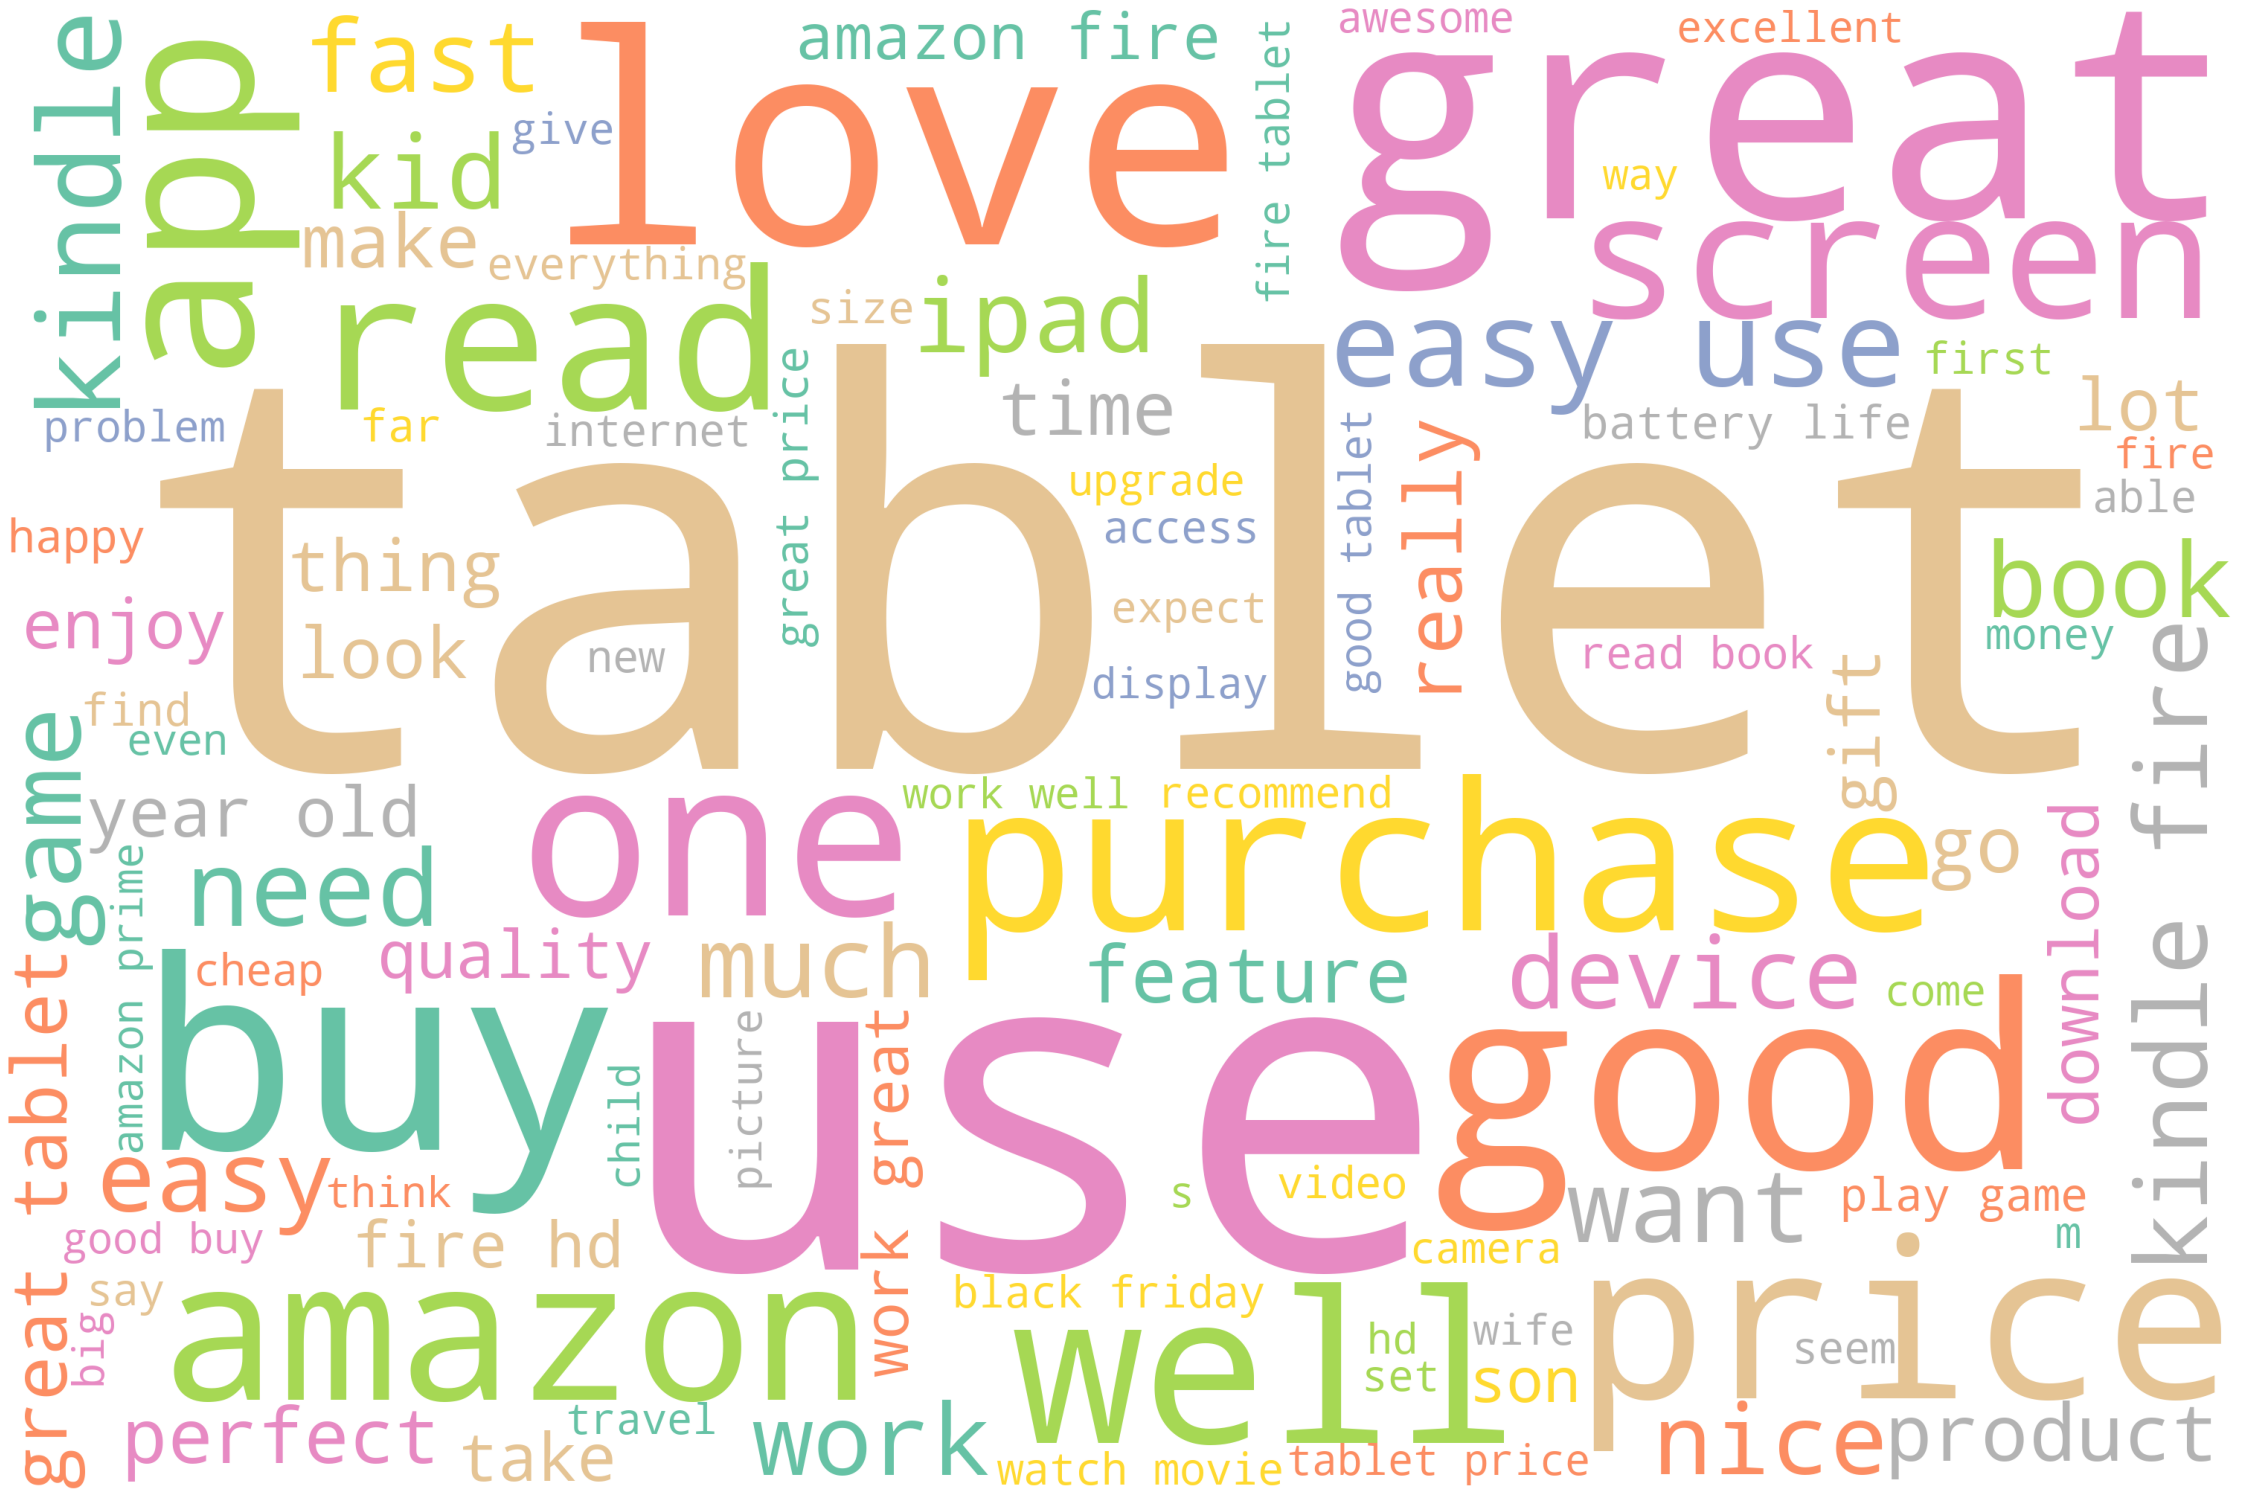

In [23]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [24]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [25]:
for token in doc_block[100:200]:
    print(token,token.pos_)

visit VERB
set VERB
user NOUN
enter VERB
age NOUN
name NOUN
amazon NOUN
make VERB
sure ADJ
access NOUN
site NOUN
content NOUN
appropriate ADJ
age NOUN
simple ADJ
love NOUN
capability NOUN
also ADV
buy VERB
installed ADJ
64gig NOUN
sd ADP
card NOUN
give VERB
little ADJ
tablet ADJ
plenty ADJ
storage NOUN
for ADP
price NOUN
think VERB
tablet PROPN
good ADJ
one NOUN
you PRON
spend VERB
hundred NUM
dollar NOUN
additional ADJ
speed NOUN
capacity NOUN
come VERB
basic ADJ
tablet NOUN
everything PRON
people NOUN
ever ADV
need VERB
fraction NOUN
cost VERB
this DET
amazon NOUN
fire NOUN
8 NUM
inch NOUN
tablet ADJ
perfect ADJ
size NOUN
purchase NOUN
husband NOUN
big ADJ
screen NOUN
phone NOUN
he PRON
get VERB
one NUM
year NOUN
ago ADV
know VERB
would AUX
good ADJ
purchase VERB
great ADJ
ereading NOUN
go VERB
nice ADJ
light ADJ
weight NOUN
price NOUN
point NOUN
give VERB
definitely ADV
worth ADJ
purchase NOUN
give VERB
christmas PROPN
gift NOUN
inlaw NOUN
husband NOUN
uncle NOUN
they PRON
love VERB

In [26]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['price', 'point', 'give', 'purchase', 'give', 'gift', 'inlaw', 'husband', 'uncle', 'love', 'use', 'feature', 'device', 'read', 'book', 'link', 'borrow', 'switch', 'tablet', 'brand', 'choice', 'make', 'take', 'time', 'get', 'book', 'nonkindle', 'reader', 'figure', 'way', 'love', 'order', 'book', 'read', 'reader', 'user', 'cease', 'ad', 'pop', 'product', 'use', 'screen', 'make', 'watch', 'movie', 'read', 'want', 'value', 'watch', 'movie', 'play', 'game', 'use', 'need', 'thank', 'youand', 'silk', 'work', 'wonder', 'get', 'love', 'size', 'screen', 'kindle', 'use', 'screen', 'color', 'reader', 'wantneed', 'bargain', 'tablet', 'give', 'star', 'push', 'start', 'time', 'screen', 'video', 'quality', 'lot', 'fun', 'app', 'fun', 'family', 'love', 'love', 'love', 'kindle', 'fire', 'yr', 'granddaughter', 'say', 'buy', 'purchased', 'bestlove', 'fact', 'use', 'memory', 'card', 'help']


In [27]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results


word  count
0  tablet   1221
1     use    917
2     buy    687
3    love    686
4   price    567
5    fire    532
6  kindle    468
7  amazon    410
8     get    397
9  screen    371

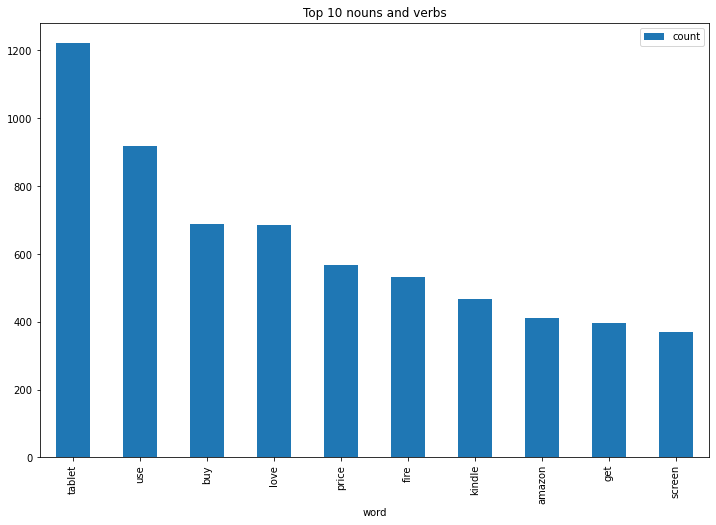

In [28]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis


In [29]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['This product so far has not disappointed.',
 'My children love to use it and I like the ability to monitor control what content they see with ease.',
 'great for beginner or experienced person.',
 'Bought as a gift and she loves it Inexpensive tablet for him to use and learn on, step up from the NABI.',
 'He was thrilled with it, learn how to Skype on it already...',
 "I've had my Fire HD 8 two weeks now and I love it.",
 'This tablet is a great value.We are Prime Members and that is where this tablet SHINES.',
 'I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model.',
 'The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.',
 'I bought this fo

In [30]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0             This product so far has not disappointed.
1     My children love to use it and I like the abil...
2             great for beginner or experienced person.
3     Bought as a gift and she loves it Inexpensive ...
4     He was thrilled with it, learn how to Skype on...
...                                                 ...
6495  I can check my email, update my Facebook statu...
6496  I had a new one but it stopped working....So I...
6497                                      Works great!!
6498  Loved it very good screen quality and clarity,...
6499  But if your hooked on google play id go with a...

[6500 rows x 1 columns]

In [31]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [32]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [33]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [34]:
calculate_sentiment(text='hate')

-3

In [35]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       -2
1        9
2        3
3        5
4        0
        ..
6495     0
6496    -1
6497     3
6498    19
6499     0
Name: sentiment_value, Length: 6500, dtype: int64

In [36]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0        7
1       20
2        6
3       22
4       12
        ..
6495    15
6496    17
6497     2
6498    49
6499    13
Name: word_count, Length: 6500, dtype: int64

In [37]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
2545  That Samsung tab lagged a lot but I haven't se...              -10   
138   The worst thing is that my steals it all the t...               -5   
5967  Not crazy about seeing the ads that pop up, bu...               -5   
1244  I purchased the fire HD 8 and exchanged n pay ...               -5   
3125                         No problems with the fire.               -5   
...                                                 ...              ...   
6498  Loved it very good screen quality and clarity,...               19   
6049  They do not have a great selection and when I ...               20   
4263  Definitely an amazing deal at an amazing price...               21   
283   my kids enjoy the Fire HD and they love the pi...               21   
38    Great video quality lots of fun apps fun for t...               28   

      word_count  
2545          28  
138           11  
5967          21  
1244          15  
3125           5  
...          ...  
6498          49  
6049          68  
4263          52  
283          142  
38            76  

[6500 rows x 3 columns]

In [38]:
sent_df['sentiment_value'].describe()

count    6500.000000
mean        1.996923
std         2.559943
min       -10.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        28.000000
Name: sentiment_value, dtype: float64

In [39]:
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0             This product so far has not disappointed.               -2   
4     He was thrilled with it, learn how to Skype on...                0   
10    I set it up with her as the user, entered her ...                0   
12    I also bought and installed a 64gig SD card wh...                0   
14    You can spend hundreds of dollars more for add...                0   
...                                                 ...              ...   
6486  We looked at replacing it with another Fire 7 ...                0   
6489  I had the original Kindle and just decided to ...                0   
6495  I can check my email, update my Facebook statu...                0   
6496  I had a new one but it stopped working....So I...               -1   
6499  But if your hooked on google play id go with a...                0   

      word_count  
0              7  
4             12  
10            32  
12            17  
14            35  
...          ...  
6486          15  
6489          10  
6495          15  
6496          17  
6499          13  

[2386 rows x 3 columns]

In [40]:
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
1     My children love to use it and I like the abil...                9   
2             great for beginner or experienced person.                3   
3     Bought as a gift and she loves it Inexpensive ...                5   
5     I've had my Fire HD 8 two weeks now and I love...                3   
6     This tablet is a great value.We are Prime Memb...                3   
...                                                 ...              ...   
6492  Battery great to Several friends suggested I b...                3   
6493                                        I love it!!                3   
6494                               Great for traveling!                3   
6497                                      Works great!!                3   
6498  Loved it very good screen quality and clarity,...               19   

      word_count  
1             20  
2              6  
3             22  
5             13  
6             16  
...          ...  
6492          11  
6493           3  
6494           3  
6497           2  
6498          49  

[4114 rows x 3 columns]

In [41]:
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0             This product so far has not disappointed.               -2   
1     My children love to use it and I like the abil...                9   
2             great for beginner or experienced person.                3   
3     Bought as a gift and she loves it Inexpensive ...                5   
4     He was thrilled with it, learn how to Skype on...                0   
...                                                 ...              ...   
6495  I can check my email, update my Facebook statu...                0   
6496  I had a new one but it stopped working....So I...               -1   
6497                                      Works great!!                3   
6498  Loved it very good screen quality and clarity,...               19   
6499  But if your hooked on google play id go with a...                0   

      word_count  index  
0              7      0  
1             20      1  
2              6      2  
3             22      3  
4             12      4  
...          ...    ...  
6495          15   6495  
6496          17   6496  
6497           2   6497  
6498          49   6498  
6499          13   6499  

[6500 rows x 4 columns]

C:\Users\mukun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

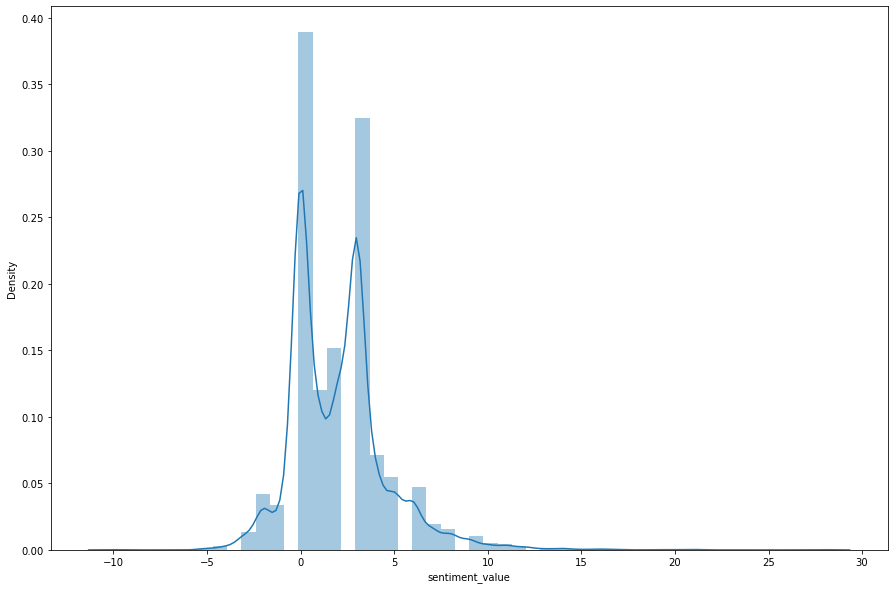

In [42]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

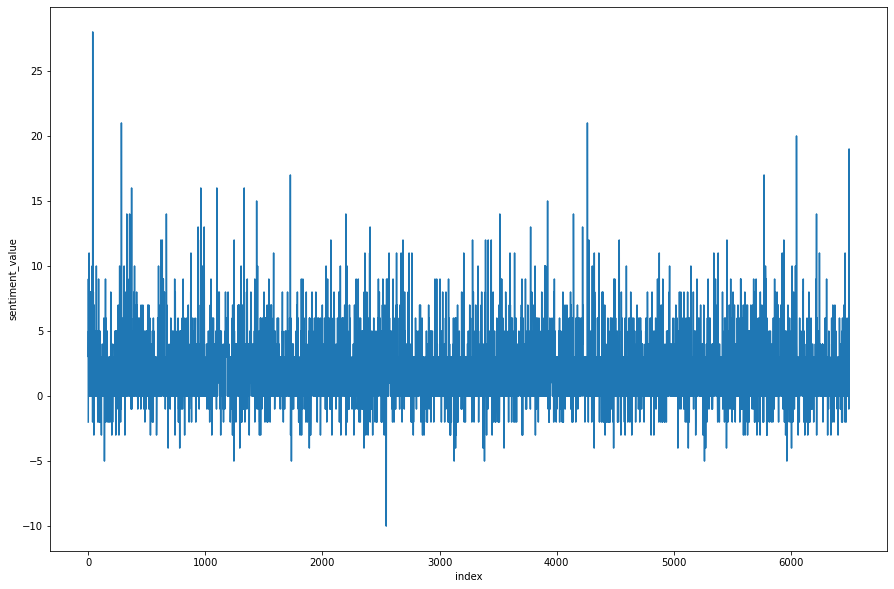

In [43]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)